In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
import sklearn.linear_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
sp500_downloaded = pd.read_csv('stock_market_data_2023.csv', index_col = 0)
sp500_downloaded.index = pd.to_datetime(sp500_downloaded.index)

In [6]:
sp500_downloaded

,Open,High,Low,Close,Volume
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000
...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,2748450000
2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,2698860000


In [7]:
#Looking at too much data would make the model more inaccurate.
#The market changes over time and the market shift would make old data worsen the model
#To prevent this, data from after 1990 is taken

specificDate = pd.to_datetime("1990-01-01").date()
sp500_downloaded = sp500_downloaded.loc[specificDate:].copy()

#Deleting these columns from the data frame as they are for individual stocks and not required to index
del sp500_downloaded["Dividends"]
del sp500_downloaded["Stock Splits"]

KeyError: 'Dividends'

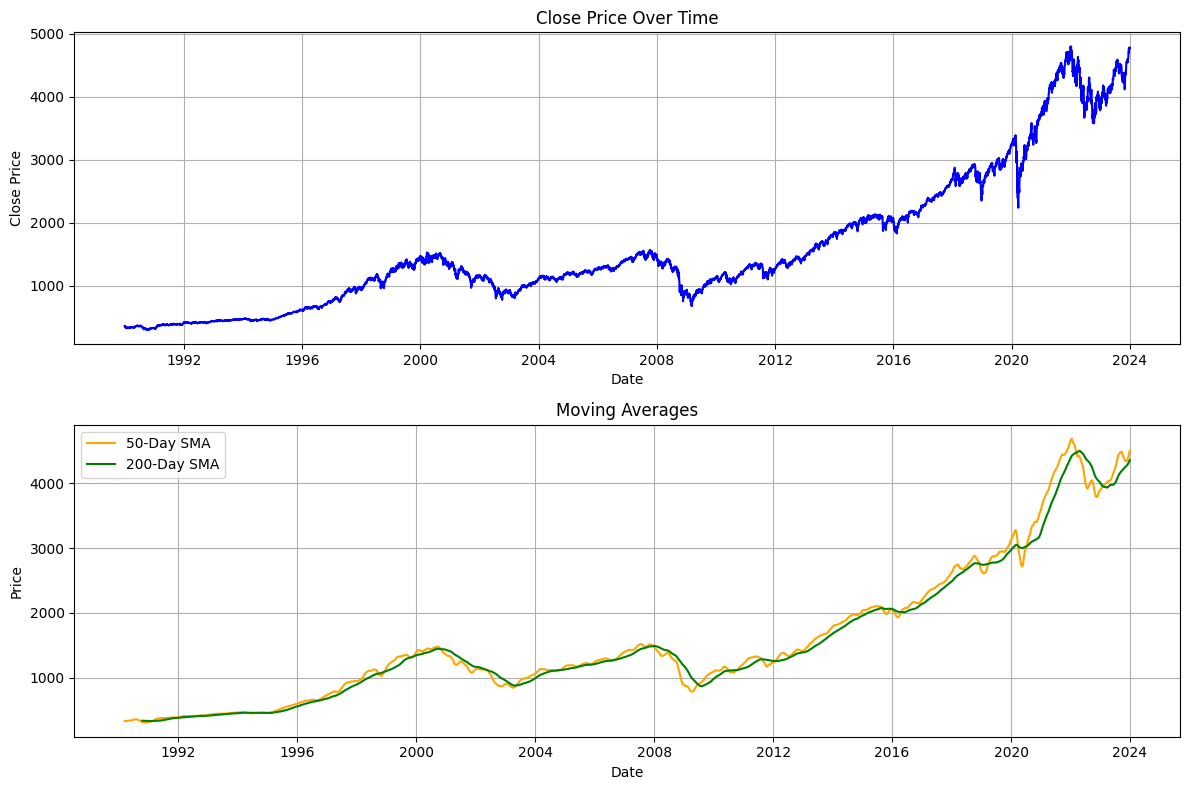

In [8]:
#Caclualting SMA;s


# Calculate Moving Averages
sp500_downloaded['SMA_50'] = sp500_downloaded['Close'].rolling(window=50).mean()
sp500_downloaded['SMA_200'] = sp500_downloaded['Close'].rolling(window=200).mean()


# Moving Averages Plot
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(sp500_downloaded.index, sp500_downloaded['Close'], color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(sp500_downloaded.index, sp500_downloaded['Close'].rolling(window=50).mean(), label='50-Day SMA', color='orange')
plt.plot(sp500_downloaded.index, sp500_downloaded['Close'].rolling(window=200).mean(), label='200-Day SMA', color='green')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [9]:
sp500_downloaded

,Open,High,Low,Close,Volume,SMA_50,SMA_200
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,NaN,NaN
...,...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,4468.218584,4335.861046
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4477.157988,4340.426846
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4485.316992,4345.055946
2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,4493.519990,4349.376246


In [10]:
# creating a column that shows the next day's closing price
sp500_downloaded["Tomorrow_SMA50"] = sp500_downloaded["SMA_50"].shift(-1)
# creating the target column that uses the "Tomorrow" column to see if the price increases the next day
sp500_downloaded["Target_SMA50"] = (sp500_downloaded["Tomorrow_SMA50"] > sp500_downloaded["SMA_50"]).astype(int)

In [11]:
# creating a column that shows the next day's closing price
sp500_downloaded["Tomorrow_SMA200"] = sp500_downloaded["SMA_200"].shift(-1)
# creating the target column that uses the "Tomorrow" column to see if the price increases the next day
sp500_downloaded["Target_SMA200"] = (sp500_downloaded["Tomorrow_SMA200"] > sp500_downloaded["SMA_200"]).astype(int)

In [12]:
# Creating a random forest with 500 decision trees ('n_estimators')
model = RandomForestClassifier(n_estimators=5500, min_samples_split=5, random_state=1)

# Creating a test set of the last 100 items
train = sp500_downloaded.iloc[:-100]
test = sp500_downloaded.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low", "SMA_50"]
# Drop samples with missing values
train = train.dropna()
test = test.dropna()

# Fit the model to the training data
model.fit(train[predictors], train["Target_SMA50"])

# Predict using the model
predictions = model.predict(test[predictors])

In [14]:
# Generating predictions on the test set and converting into a pandas series
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [ ]:
# Calculating precision score by comparing our predictions with the target of the test set
precision_score(test["Target_SMA50"], preds)

In [ ]:
#2008-2010 Market Crash

from sklearn.metrics import accuracy_score, precision_score


df_2008_2010 = sp500_downloaded[(sp500_downloaded.index.year >= 2008) & (sp500_downloaded.index.year <= 2010)]

# Drop samples with missing values
df_2008_2009 = df_2008_2010.dropna()
# Splitting data into train and test sets
train_size = int(0.8 * len(df_2008_2010))  # 80% train, 20% test
train = df_2008_2010[:train_size]
test = df_2008_2010[train_size:]

# Drop samples with missing values
train = train.dropna()
test = test.dropna()

predictors = ["Close", "Volume", "Open", "High", "Low","SMA_200"]

# Fit the model to the training data
model.fit(train[predictors], train["Target_SMA200"])

# Predict using the model
predictions = model.predict(test[predictors])

# Evaluate the model
accuracy = accuracy_score(test["Target_SMA200"], predictions)
print("Accuracy:", accuracy)

precision = precision_score(test["Target_SMA200"], predictions)
print("Precision:", precision)
